In [ ]:
import matplotlib as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("aca.csv",encoding="utf-8")

In [ ]:
df_set = df
#so i dont have to escape and can use single quotes
df_set = df_set.rename(columns = {'Daytime/evening attendance\t':"Daytime/evening attendance"})
df_set = df_set.rename(columns ={"Mother's qualification":"Mothers qualification"})
df_set = df_set.rename(columns ={"Father's qualification":"Fathers qualification"})
df_set = df_set.rename(columns ={"Mother's occupation":"Mothers occupation"})
df_set = df_set.rename(columns ={"Father's occupation":"Fathers occupation"})
df_set

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
cat_cols = ['Marital status','Application mode','Application order','Course','Daytime/evening attendance','Previous qualification',
            'Nacionality','Mothers qualification','Fathers qualification','Mothers occupation',
            'Fathers occupation','Displaced','Educational special needs','Debtor','Tuition fees up to date','Gender',
            'Scholarship holder','International']2

for col in cat_cols:  # Or identify specific columns
    df_set[col] = df_set[col].astype('category')
    
df_set.dtypes

df_set.drop(columns = ['GDP','Inflation rate','Unemployment rate'], axis=1, inplace=True)

target_mapping = {'Graduate': 2, 'Enrolled': 1, 'Dropout': 0}
df_set['Target'] = df_set['Target'].replace(target_mapping)

#scale numeric
num_columns = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)',
                    'Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)',
                    'Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)',
                    'Curricular units 2nd sem (credited)',
                    'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)',
                    'Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)']

    
scaler = StandardScaler()
df_set[num_columns] = scaler.fit_transform(df_set[num_columns])


In [ ]:
feature = df_set.drop('Target',axis=1) # Features (input variables)
target = df_set['Target'] # Target (output variable)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=target)

In [ ]:
clf = OneVsOneClassifier(
    LinearSVC(random_state=0)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf2 = OneVsRestClassifier(
    LinearSVC(random_state=0)).fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

/shared-libs/python3.10/py/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.10/py/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.10/py/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.10/py/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.10/py/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.10/py/lib/python3.10/site-packages/sklearn/svm/_base.p

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 61  39 184]
 [ 15  11 133]
 [ 24   3 415]]


In [ ]:
class_labels = ['Graduate', 'Enrolled', 'Dropout']  # Adjust as per your labels
print("\nConfusion Matrix with Labels:")
print(pd.DataFrame(cm, index=[f'True {c}' for c in class_labels],
                  columns=[f'Pred {c}' for c in class_labels]))


Confusion Matrix with Labels:
               Pred Graduate  Pred Enrolled  Pred Dropout
True Graduate             61             39           184
True Enrolled             15             11           133
True Dropout              24              3           415


In [ ]:
cm2 = confusion_matrix(y_test, y_pred)

class_labels = ['Graduate', 'Enrolled', 'Dropout']  # Adjust as per your labels
print("\nConfusion Matrix with Labels:")
print(pd.DataFrame(cm2, index=[f'True {c}' for c in class_labels],
                  columns=[f'Pred {c}' for c in class_labels]))


Confusion Matrix with Labels:
               Pred Graduate  Pred Enrolled  Pred Dropout
True Graduate             61             39           184
True Enrolled             15             11           133
True Dropout              24              3           415


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:
poly_accuracy = accuracy_score(y_test, y_pred)
poly_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))


Accuracy (Polynomial Kernel):  75.71
F1 (Polynomial Kernel):  72.67


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid_linear = {
    'C': [0.1, 1, 10, 20],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}
svcLinTune= SVC(random_state=42, kernel='linear')
grid_searchLinTune = GridSearchCV(estimator=svcLinTune, param_grid=param_grid_linear, cv=3)

# Perform grid search
grid_searchLinTune.fit(X_train, y_train)

best_params = grid_searchLinTune.best_params_
print("Best parameters:", best_params)

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
svc = SVC(kernel='linear', C=10.0, gamma='auto', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

poly_accuracy = accuracy_score(y_test, y_pred)
poly_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  75.03
F1 (Polynomial Kernel):  72.83


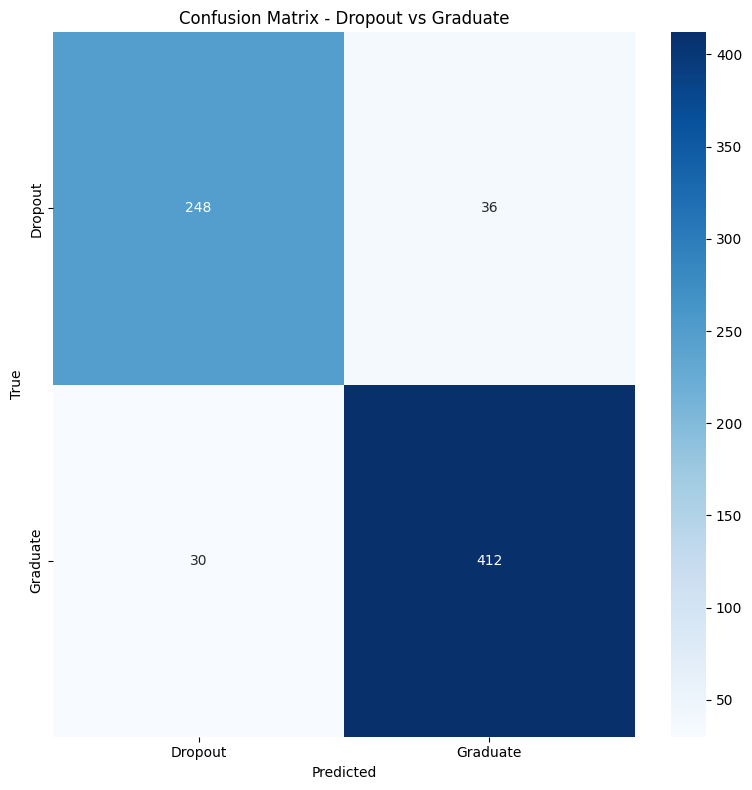

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

test = [[248, 36],
        [30, 412]]

plt.figure(figsize=(8, 8))  # Increase the height of the plot
sns.heatmap(test, annot=True, fmt="d", cmap="Blues", xticklabels=["Dropout", "Graduate"],
            yticklabels=["Dropout", "Graduate"])
plt.title("Confusion Matrix - Dropout vs Graduate")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()  # Ensure tight layout
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32fd6ad5-d688-4e0a-9fc6-55e2a5bea8cc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>